In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector
import random
from math import dist
import lane_detection

image_file = 'pool_lane.png'
im = cv2.imread(image_file)
h, w, c = im.shape
print("height: ", h)
print("width: ", w)
print("channel: ", c)

height:  2138
width:  3824
channel:  3


([0.15870666828986213, -2.8966817923993196], [-4437.246498111013, 2106.634728478991])
center lane coords:  [((6298.035791779525, 1000), (12598.96826535145, 2000))]
center lane coords:  [((6298.035791779525, 1000), (12598.96826535145, 2000)), ((2106.409363491847, 1000), (2106.1839985047036, 2000))]


error: OpenCV(4.12.0) :-1: error: (-5:Bad argument) in function 'imread'
> Overload resolution failed:
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object


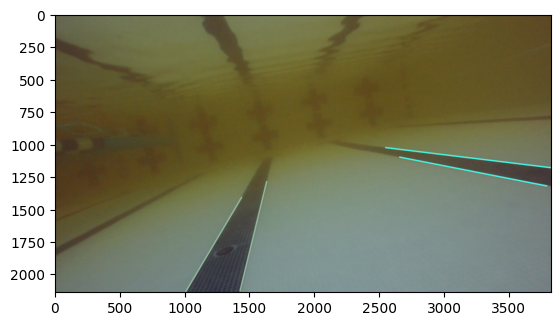

In [55]:
def get_lane_center(lanes):
    avg_slopes = []
    avg_x_ints = []
    for lane in lanes:
        slope1, slope2 = lane_detection.get_slopes_intercepts(lane)[0]
        x_int1, x_int2 = lane_detection.get_slopes_intercepts(lane)[1]
        avg_slopes.append((slope1 + slope2)/2)
        avg_x_ints.append((x_int1 + x_int2)/2)
        #print(avg_slopes, avg_x_ints)
    return avg_slopes, avg_x_ints

lanes_center_info = get_lane_center(lane_detection.lanes_list)
print(lanes_center_info)
lane_1_slope = get_lane_center(lane_detection.lanes_list)[0][0]
lane_1_x_int = get_lane_center(lane_detection.lanes_list)[0][1]
lane_2_slope = get_lane_center(lane_detection.lanes_list)[1][0]
lane_2_x_int = get_lane_center(lane_detection.lanes_list)[1][1]

def slope_xint_convert_to_points(info, y_range):
    y1, y2 = y_range
    center_lane_coords = []
    for lane in info:
        slope, x_int = lane
        x1 = x_int + (y1/slope)
        x2 = x_int + (y2/slope)
        center_lane_coords.append(((x1, y1), (x2, y2)))
        print("center lane coords: ", center_lane_coords)
    return center_lane_coords

lanes_center_line_list = slope_xint_convert_to_points(lanes_center_info, (1000, 2000))

plt.imshow(lane_detection.laned_image)
center_lined_laned_image = lane_detection.draw_lines(lane_detection.laned_image, lanes_center_line_list)
plt.imshow(center_lined_laned_image)
